## DATA 601 Project-3 (Fall 2021)

### File-1: Maryland Statewide Vehicle Crashes: 
#### https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu
### File-2: Person Details: 
#### https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf
### File-3: Vehicle Details: 
#### https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

## Questions from the datasets
### Question:1
#### Number of accidents where the speed limit was above 51 miles per hour are 16052 
### Question:2
#### Determine the number of accidents where the speed limit was below 41 miles per
### Question: 3
#### On which day of the week (Monday through Sunday) do the most of the crashes happen? 

## Installing libraries needed

In [1]:
!pip install missingno
!pip install seaborn

## Importing libraries needed

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import andrews_curves

In [3]:
!ls

Maryland_Statewide_Vehicle_Crashes.csv
Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv
Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv
Project-3.ipynb


### Loading the csv file in to the new dataframe

In [4]:
#Loading the data into the dataframe
crashes = pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv", low_memory=False)

In [5]:
#Displaying head of the dataset
crashes.head()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,...,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [6]:
# checking the null values in crashes dataframe
crashes.isnull().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                27616
LIGHT_CODE                    0
COUNTY_DESC                   8
COUNTY_NO                     8
MUNI_DESC                742925
MUNI_CODE                191564
JUNCTION_DESC             99506
JUNCTION_CODE             74657
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            76817
SURF_COND_CODE            74657
LANE_DESC                179323
LANE_CODE                179315
RD_COND_DESC              74657
RD_COND_CODE              74657
RD_DIV_DESC               78656
RD_DIV_CODE               74657
FIX_OBJ_DESC              39831
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             324237
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 398287
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE

In [7]:
#Loading the data into the dataframe
person_details = pd.read_csv("Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv", low_memory=False)

In [8]:
#Displaying head of the dataset
person_details.head()

,SEX_DESC,SEX_CODE,CONDITION_DESC,CONDITION_CODE,INJ_SEVER_DESC,INJ_SEVER_CODE,REPORT_NO,OCC_SEAT_POS_DESC,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,...,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR,Quarter
0,Female,F,Apparently Normal,1.0,No Injury,1,AE59920005,NaN,NaN,NaN,...,53cfb29a-b39b-4af2-85df-cf88d7215e79,MD,C,False,False,eacd0575-64e1-44f9-bd53-16449620c109,NaN,0.0,2017,Q2
1,Male,M,NaN,NaN,Non-incapacitating Injury,2,DA40650004,Right Front Seat,3.0,NaN,...,cb90b978-e091-4422-9ead-684355d3f4a8,NaN,NaN,NaN,NaN,ac456b44-041f-4a85-bedd-1a75fd5ff81a,A,1.0,2017,Q2
2,Female,F,NaN,NaN,Possible Incapacitating Injury,3,ZU7729000P,Center Rear Seat,5.0,NaN,...,c56e2fdd-fa91-4d49-bae9-aa1e9b51efbd,NaN,NaN,NaN,NaN,1b1906ca-09cb-4018-9273-9f215cb5d5d3,A,1.0,2016,Q2
3,Male,M,NaN,NaN,No Injury,1,CT8278002X,Right Rear Seat,6.0,NaN,...,aa15e7f7-e40e-4fdb-aedb-a966c71c7bc8,NaN,NaN,NaN,NaN,1cd6afef-9669-41a2-acd2-dee9af76f2c4,NaN,1.0,2018,Q3
4,Female,F,Apparently Normal,1.0,No Injury,1,DA3660000B,NaN,NaN,NaN,...,80375a09-f4bb-4d11-88c6-c399bafcc693,DC,NaN,False,False,b5e6a3b9-7e40-4d2d-98e9-ed32dee9a90c,NaN,NaN,2015,Q2


In [9]:
# checking the null values in person_details dataframe
person_details.isnull().sum()

SEX_DESC                  126139
SEX_CODE                  126139
CONDITION_DESC            395056
CONDITION_CODE            391963
INJ_SEVER_DESC                 0
INJ_SEVER_CODE                 0
REPORT_NO                      0
OCC_SEAT_POS_DESC        1277163
OCC_SEAT_POS_CODE        1277163
PED_VISIBLE_DESC         1634672
PED_VISIBLE_CODE         1634672
PED_OBEY_DESC            1634672
PED_OBEY_CODE            1634672
PED_TYPE_DESC            1634672
PED_TYPE_CODE            1634672
PED_LOCATION_CODE        1634672
MOVEMENT_DESC            1634672
MOVEMENT_CODE            1634672
PERSON_TYPE_DESC               0
PERSON_TYPE                    0
ALCOHOL_TEST_DESC         387726
ALCOHOL_TEST_CODE         387726
ALCOHOL_TESTTYPE_DESC    1632624
ALCOHOL_TESTTYPE_CODE    1632624
DRUG_TEST_DESC            387726
DRUG_TEST_CODE            387726
DRUG_TESTRESULT_DESC     1656141
DRUG_TESTRESULT_CODE     1656141
BAC_CODE                 1644374
FAULT_FLAG_DESC           446865
FAULT_FLAG

In [10]:
#Loading the data into the dataframe
vehicle_details = pd.read_csv("Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv", low_memory=False)

In [11]:
#Displaying head of the dataset
vehicle_details.head()

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,...,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,...,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,...,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,...,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,...,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,...,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [12]:
# checking the null values in person_details dataframe
vehicle_details.isnull().sum()

HARM_EVENT_DESC                      0
HARM_EVENT_CODE                      0
CONTI_DIRECTION_DESC            149863
CONTI_DIRECTION_CODE            149863
DAMAGE_DESC                          0
DAMAGE_CODE                          0
MOVEMENT_DESC                        0
MOVEMENT_CODE                        0
VIN_NO                           68272
REPORT_NO                            0
CV_BODY_TYPE_DESC              1330026
CV_BODY_TYPE_CODE              1330026
VEH_YEAR                         67619
VEH_MAKE                           310
VEH_MODEL                          766
COMMERCIAL_FLAG_DESC                 0
COMMERCIAL_FLAG                      0
HZM_NUM                        1383730
TOWED_AWAY_FLAG_DESC              9013
TOWED_AWAY_FLAG                      0
NUM_AXLES                      1330123
GVW_DESC                       1330026
GVW_CODE                       1330026
GOING_DIRECTION_DESC            149863
GOING_DIRECTION_CODE            149863
BODY_TYPE_DESC           

## Storing the needed columns in to different dataframe to merge

In [13]:
crashes_data=crashes[['ACC_DATE', 'ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE', 'LONGITUDE']]
persons_data=person_details[['REPORT_NO','SEX_DESC','LICENSE_STATE_CODE','DATE_OF_BIRTH']]
vehicles_data=vehicle_details[['VEH_YEAR', 'VEH_MAKE','REPORT_NO','SPEED_LIMIT']]  

### Displaying head of the dataset



In [14]:
crashes_data.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693
1,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429
2,20200504,09:46:00,NaN,EJ7878001D,Montgomery,39.140680,-77.193413
3,20170507,10:39:00,Other,ADI7910042,Baltimore City,39.282928,-76.635215
4,20200414,17:32:00,NaN,MSP6709008R,Cecil,39.611028,-75.951314


### Displaying head of the dataset 

In [15]:
persons_data.head()

,REPORT_NO,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH
0,AE59920005,Female,MD,19901109
1,DA40650004,Male,NaN,19940925
2,ZU7729000P,Female,NaN,09-JUL-94
3,CT8278002X,Male,NaN,20090921
4,DA3660000B,Female,DC,12-JAN-56


### Displaying head of the dataset



In [16]:
vehicles_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT
0,NaN,UNKNOWN,AE5057004X,25
1,2018.0,TOYOTA,MSP7221001P,55
2,2019.0,CHEVROLET,DA37010040,30
3,NaN,UNKNOWN,MDTA1791002C,35
4,2002.0,HONDA,AE456100BL,35


## Merging data sets crashes_data, persons_data, vehicles_data

In [17]:
merge_data = pd.merge(pd.merge(vehicles_data,crashes_data,on="REPORT_NO"),persons_data,on="REPORT_NO")
merge_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH
0,NaN,UNKNOWN,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN
1,2005.0,CHEVY,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN
2,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,NaN,19570320
3,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,MD,19691001
4,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Female,NY,19651005


### Displaying the columns that are merged in to different data frame



In [18]:
merge_data.columns

Index(['VEH_YEAR', 'VEH_MAKE', 'REPORT_NO', 'SPEED_LIMIT', 'ACC_DATE',
       'ACC_TIME', 'WEATHER_DESC', 'COUNTY_DESC', 'LATITUDE', 'LONGITUDE',
       'SEX_DESC', 'LICENSE_STATE_CODE', 'DATE_OF_BIRTH'],
      dtype='object')

### Datatypes of every column in merged data set 

In [19]:
merge_data.dtypes

VEH_YEAR              float64
VEH_MAKE               object
REPORT_NO              object
SPEED_LIMIT             int64
ACC_DATE                int64
ACC_TIME               object
WEATHER_DESC           object
COUNTY_DESC            object
LATITUDE              float64
LONGITUDE             float64
SEX_DESC               object
LICENSE_STATE_CODE     object
DATE_OF_BIRTH          object
dtype: object

### Displaying the null values in the merged dataset

In [20]:
merge_data.isnull().sum()

VEH_YEAR               123946
VEH_MAKE                  513
REPORT_NO                   0
SPEED_LIMIT                 0
ACC_DATE                    0
ACC_TIME                    0
WEATHER_DESC          1507816
COUNTY_DESC                25
LATITUDE                    0
LONGITUDE                   0
SEX_DESC               252426
LICENSE_STATE_CODE    1082126
DATE_OF_BIRTH          258153
dtype: int64

### Dropping the duplicates from merged datasets

In [21]:
merge_data = merge_data.drop_duplicates(subset="REPORT_NO")
merge_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH
0,NaN,UNKNOWN,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN
2,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,NaN,19570320
26,2019.0,CHEVROLET,DA37010040,30,20200609,16:05:00,NaN,Prince George's,38.879370,-76.896372,NaN,NaN,NaN
30,NaN,UNKNOWN,MDTA1791002C,35,20200623,12:14:00,NaN,Baltimore City,39.253400,-76.571600,NaN,NaN,NaN
31,2002.0,HONDA,AE456100BL,35,20200421,17:43:00,NaN,Baltimore,39.345828,-76.736014,Male,MD,19671103


### Null values in the merged dataset

In [22]:
merge_data.isnull().sum()

VEH_YEAR               35535
VEH_MAKE                 138
REPORT_NO                  0
SPEED_LIMIT                0
ACC_DATE                   0
ACC_TIME                   0
WEATHER_DESC          319348
COUNTY_DESC                8
LATITUDE                   0
LONGITUDE                  0
SEX_DESC               83739
LICENSE_STATE_CODE    182870
DATE_OF_BIRTH          85519
dtype: int64

### Heatmap for null values in the merged datasets

<AxesSubplot:>

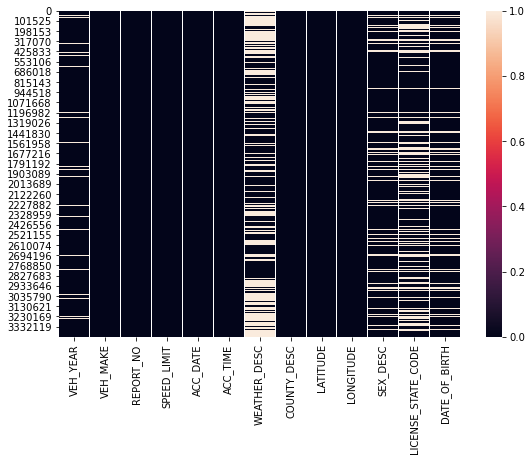

In [23]:
plt.figure(figsize=(9,6))
sns.heatmap(merge_data.isna())

### Dropping null values in merged datasets

In [24]:
merge_data.dropna()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH
382,2007.0,HONDA,MSP692000FH,55,20200620,15:02:00,Raining,Montgomery,39.020563,-77.105560,Male,DC,20010928
396,2016.0,JEEP,AE4573000X,25,20200510,05:35:00,Not Applicable,Baltimore,39.237851,-76.508157,Male,MD,19760819
412,2014.0,ACURA,CB55250019,55,20200413,07:45:00,Raining,Howard,39.131735,-76.919248,Female,MD,19571025
428,2017.0,FORD,AE427900PV,30,20200618,06:40:00,Raining,Baltimore,39.455831,-76.634470,Male,MD,19711004
473,2020.0,INTL,MDTA1806001S,55,20200613,16:19:00,Not Applicable,Baltimore City,39.279992,-76.551151,Male,DE,19800419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436590,2002.0,SATURN,ZF0563001W,55,20210814,20:41:00,Raining,Carroll,39.575278,-76.996111,Female,MD,19390826
3436604,2020.0,SUBARU,MCP15000021,40,20210922,17:32:00,Raining,Montgomery,39.142775,-76.999973,Female,MD,19800710
3436619,2012.0,HYUNDAI,MSP636700RG,55,20210701,22:21:00,Raining,Baltimore,39.257916,-76.698339,Male,VA,19871007
3436628,2008.0,DODGE,MDTA14700027,60,20210701,13:55:00,Raining,Montgomery,39.093123,-77.029164,Male,MD,19790608


### Calculating age based on the Date_Of_Birth in the merged dataset

In [25]:
merge_data = merge_data.assign(age = 2020-pd.to_datetime(merge_data['DATE_OF_BIRTH']).dt.year)

In [26]:
print(merge_data.age)

0           NaN
2          63.0
26          NaN
30          NaN
31         53.0
           ... 
3436636    33.0
3436637    57.0
3436638    26.0
3436639    76.0
3436641    49.0
Name: age, Length: 732820, dtype: float64


In [27]:
merge_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,age
0,NaN,UNKNOWN,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN,NaN
2,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,NaN,19570320,63.0
26,2019.0,CHEVROLET,DA37010040,30,20200609,16:05:00,NaN,Prince George's,38.879370,-76.896372,NaN,NaN,NaN,NaN
30,NaN,UNKNOWN,MDTA1791002C,35,20200623,12:14:00,NaN,Baltimore City,39.253400,-76.571600,NaN,NaN,NaN,NaN
31,2002.0,HONDA,AE456100BL,35,20200421,17:43:00,NaN,Baltimore,39.345828,-76.736014,Male,MD,19671103,53.0


### Visualising age in histogram plot

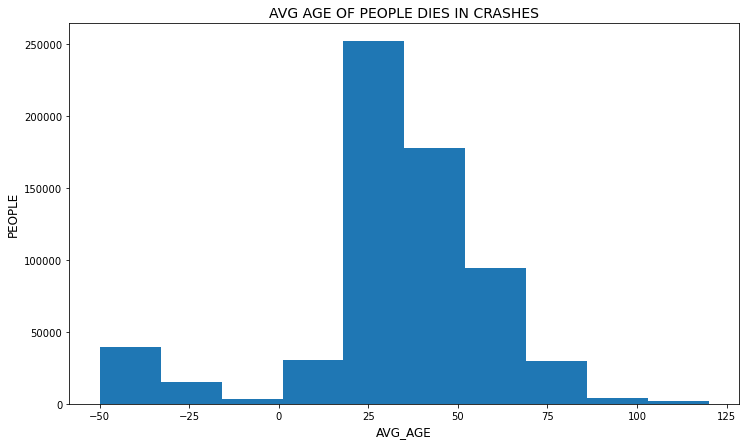

In [28]:
plt.figure(figsize=(12,7))
plt.hist(merge_data['age'])
plt.xlabel("AVG_AGE",fontsize=12)
plt.ylabel("PEOPLE",fontsize=12)
plt.title("AVG AGE OF PEOPLE DIES IN CRASHES",fontsize=14)
plt.show()

### Calculating number of crashes from the merged dataset using 2 coulmns ['VEH_MAKE'],['ACC_DATE']

In [29]:
No_Of_Crashes = merge_data.groupby(['VEH_MAKE'])['ACC_DATE'].count()

### Printing number of crashes happened using vehicle model and accident dates

In [30]:
print(No_Of_Crashes)

VEH_MAKE
"CHEVROLET        1
*                 1
,AZDA             1
,MAZDA            1
-                 2
                 ..
ZHEJIANG LEIKE    1
ZHNG              5
ZNEN              2
`BUIC             1
`TOYOTA           1
Name: ACC_DATE, Length: 5344, dtype: int64


### Histogram plot for number of crashes in different years

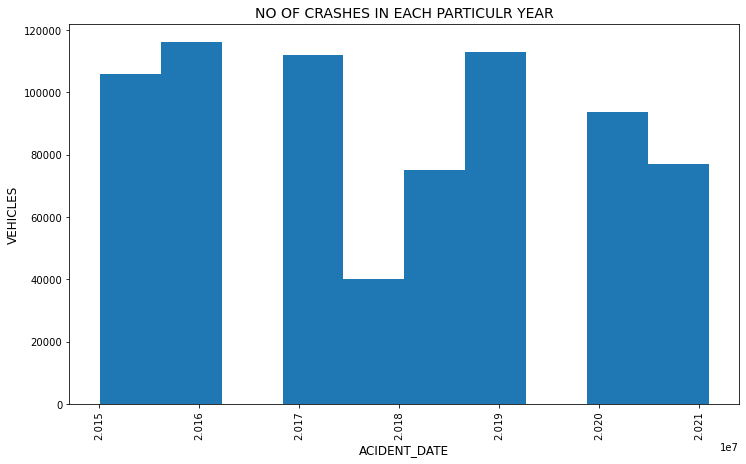

In [31]:
plt.figure(figsize=(12,7))
plt.hist(merge_data['ACC_DATE'])
plt.xticks(rotation=90)
plt.xlabel("ACIDENT_DATE",fontsize=12)
plt.ylabel("VEHICLES",fontsize=12)
plt.title("NO OF CRASHES IN EACH PARTICULR YEAR",fontsize=14)
plt.show()

### Columns from the merged data set

In [32]:
merge_data.columns

Index(['VEH_YEAR', 'VEH_MAKE', 'REPORT_NO', 'SPEED_LIMIT', 'ACC_DATE',
       'ACC_TIME', 'WEATHER_DESC', 'COUNTY_DESC', 'LATITUDE', 'LONGITUDE',
       'SEX_DESC', 'LICENSE_STATE_CODE', 'DATE_OF_BIRTH', 'age'],
      dtype='object')

### Finding the vehicle age based on the vehicle that crashed in which year

In [33]:
merge_data = merge_data.assign(vehicle_age = 2020-pd.to_datetime(merge_data['VEH_YEAR']).dt.year)

### Printing the age of the vehicle


In [34]:
print(merge_data.vehicle_age)

0           NaN
2          50.0
26         50.0
30          NaN
31         50.0
           ... 
3436636    50.0
3436637    50.0
3436638    50.0
3436639    50.0
3436641    50.0
Name: vehicle_age, Length: 732820, dtype: float64


In [35]:
merge_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,age,vehicle_age
0,NaN,UNKNOWN,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN,NaN,NaN
2,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,NaN,19570320,63.0,50.0
26,2019.0,CHEVROLET,DA37010040,30,20200609,16:05:00,NaN,Prince George's,38.879370,-76.896372,NaN,NaN,NaN,NaN,50.0
30,NaN,UNKNOWN,MDTA1791002C,35,20200623,12:14:00,NaN,Baltimore City,39.253400,-76.571600,NaN,NaN,NaN,NaN,NaN
31,2002.0,HONDA,AE456100BL,35,20200421,17:43:00,NaN,Baltimore,39.345828,-76.736014,Male,MD,19671103,53.0,50.0


### Grouping the vehicle model and accident date to find the average cars that got crashed

In [36]:
avg_car = merge_data.groupby(['VEH_MAKE'])['ACC_DATE'].mean()

In [37]:
avg_car

VEH_MAKE
"CHEVROLET        20190728.0
*                 20150203.0
,AZDA             20180122.0
,MAZDA            20170116.0
-                 20175807.0
                     ...    
ZHEJIANG LEIKE    20210922.0
ZHNG              20192551.8
ZNEN              20165824.5
`BUIC             20200101.0
`TOYOTA           20210105.0
Name: ACC_DATE, Length: 5344, dtype: float64

### Finding the number of crashes on the particular date based on the accident year

In [38]:
merge_data = merge_data.assign(accident_date = 2020-pd.to_datetime(merge_data['ACC_DATE']).dt.year)

In [39]:
print(merge_data.accident_date)

0          50
2          50
26         50
30         50
31         50
           ..
3436636    50
3436637    50
3436638    50
3436639    50
3436641    50
Name: accident_date, Length: 732820, dtype: int64


In [40]:
merge_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,age,vehicle_age,accident_date
0,NaN,UNKNOWN,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN,NaN,NaN,50
2,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,NaN,19570320,63.0,50.0,50
26,2019.0,CHEVROLET,DA37010040,30,20200609,16:05:00,NaN,Prince George's,38.879370,-76.896372,NaN,NaN,NaN,NaN,50.0,50
30,NaN,UNKNOWN,MDTA1791002C,35,20200623,12:14:00,NaN,Baltimore City,39.253400,-76.571600,NaN,NaN,NaN,NaN,NaN,50
31,2002.0,HONDA,AE456100BL,35,20200421,17:43:00,NaN,Baltimore,39.345828,-76.736014,Male,MD,19671103,53.0,50.0,50


In [41]:
merge_data.columns

Index(['VEH_YEAR', 'VEH_MAKE', 'REPORT_NO', 'SPEED_LIMIT', 'ACC_DATE',
       'ACC_TIME', 'WEATHER_DESC', 'COUNTY_DESC', 'LATITUDE', 'LONGITUDE',
       'SEX_DESC', 'LICENSE_STATE_CODE', 'DATE_OF_BIRTH', 'age', 'vehicle_age',
       'accident_date'],
      dtype='object')

### Shape of the merged dataset

In [42]:
merge_data.shape

(732820, 16)

### Storing accident date and time in correct format

In [43]:
merge_data['accident_dt']=pd.to_datetime(merge_data['accident_date'].astype(str)+' '+merge_data['ACC_TIME'].astype(str))

In [44]:
print(merge_data.accident_dt)

0         2050-01-01 11:40:00
2         2050-01-01 12:22:00
26        2050-01-01 16:05:00
30        2050-01-01 12:14:00
31        2050-01-01 17:43:00
                  ...        
3436636   2050-01-01 02:30:00
3436637   2050-01-01 11:21:00
3436638   2050-01-01 18:40:00
3436639   2050-01-01 11:24:00
3436641   2050-01-01 04:20:00
Name: accident_dt, Length: 732820, dtype: datetime64[ns]


In [45]:
merge_data.head()

,VEH_YEAR,VEH_MAKE,REPORT_NO,SPEED_LIMIT,ACC_DATE,ACC_TIME,WEATHER_DESC,COUNTY_DESC,LATITUDE,LONGITUDE,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,age,vehicle_age,accident_date,accident_dt
0,NaN,UNKNOWN,AE5057004X,25,20200528,11:40:00,Not Applicable,Baltimore,39.245577,-76.702305,NaN,NaN,NaN,NaN,NaN,50,2050-01-01 11:40:00
2,2018.0,TOYOTA,MSP7221001P,55,20200605,12:22:00,NaN,Prince George's,38.989139,-76.883444,Male,NaN,19570320,63.0,50.0,50,2050-01-01 12:22:00
26,2019.0,CHEVROLET,DA37010040,30,20200609,16:05:00,NaN,Prince George's,38.879370,-76.896372,NaN,NaN,NaN,NaN,50.0,50,2050-01-01 16:05:00
30,NaN,UNKNOWN,MDTA1791002C,35,20200623,12:14:00,NaN,Baltimore City,39.253400,-76.571600,NaN,NaN,NaN,NaN,NaN,50,2050-01-01 12:14:00
31,2002.0,HONDA,AE456100BL,35,20200421,17:43:00,NaN,Baltimore,39.345828,-76.736014,Male,MD,19671103,53.0,50.0,50,2050-01-01 17:43:00


### Histogram for accident date and time

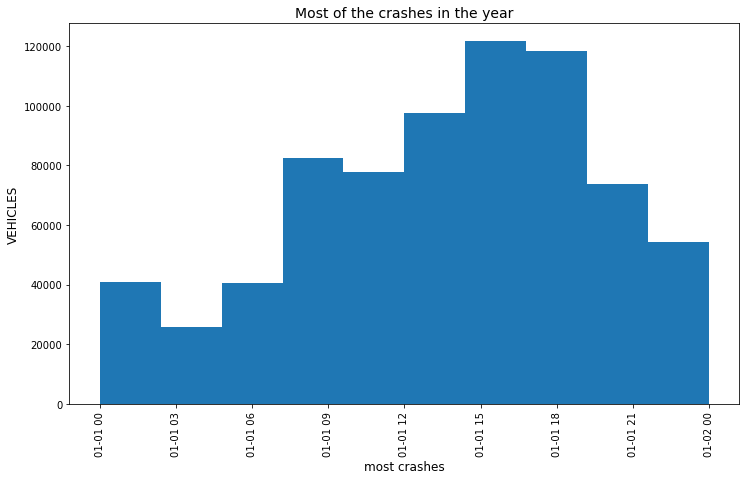

In [46]:
plt.figure(figsize=(12,7))
plt.hist(merge_data['accident_dt'])
plt.xticks(rotation=90)
plt.xlabel("most crashes",fontsize=12)
plt.ylabel("VEHICLES",fontsize=12)
plt.title("Most of the crashes in the year",fontsize=14)
plt.show()

In [47]:
merge_data.columns

Index(['VEH_YEAR', 'VEH_MAKE', 'REPORT_NO', 'SPEED_LIMIT', 'ACC_DATE',
       'ACC_TIME', 'WEATHER_DESC', 'COUNTY_DESC', 'LATITUDE', 'LONGITUDE',
       'SEX_DESC', 'LICENSE_STATE_CODE', 'DATE_OF_BIRTH', 'age', 'vehicle_age',
       'accident_date', 'accident_dt'],
      dtype='object')

### Correlating the columns in the merged data set

In [48]:
corelation=merge_data.corr()  
corelation

,VEH_YEAR,SPEED_LIMIT,ACC_DATE,LATITUDE,LONGITUDE,age,vehicle_age,accident_date
VEH_YEAR,1.000000,0.042938,0.074687,-0.025701,-0.011709,0.029842,NaN,NaN
SPEED_LIMIT,0.042938,1.000000,0.003231,-0.067996,-0.060571,-0.011125,NaN,NaN
ACC_DATE,0.074687,0.003231,1.000000,-0.019752,-0.003159,0.347352,NaN,NaN
LATITUDE,-0.025701,-0.067996,-0.019752,1.000000,-0.303104,0.000879,NaN,NaN
LONGITUDE,-0.011709,-0.060571,-0.003159,-0.303104,1.000000,-0.004535,NaN,NaN
age,0.029842,-0.011125,0.347352,0.000879,-0.004535,1.000000,NaN,NaN
vehicle_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualising heat map for correlated columns in merged dataset

<AxesSubplot:>

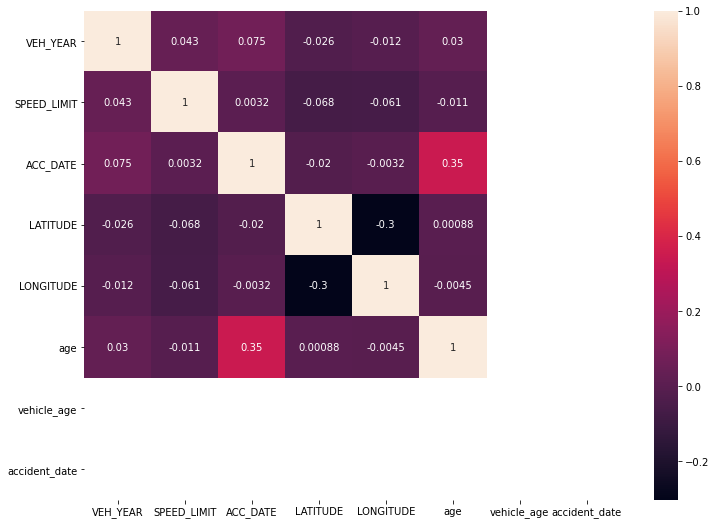

In [49]:
plt.figure(figsize=(12,9))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

### Visulasing scatterplotmatrix for merged dataset

/Users/harshithayentrapragada/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/harshithayentrapragada/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 50.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/harshithayentrapragada/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


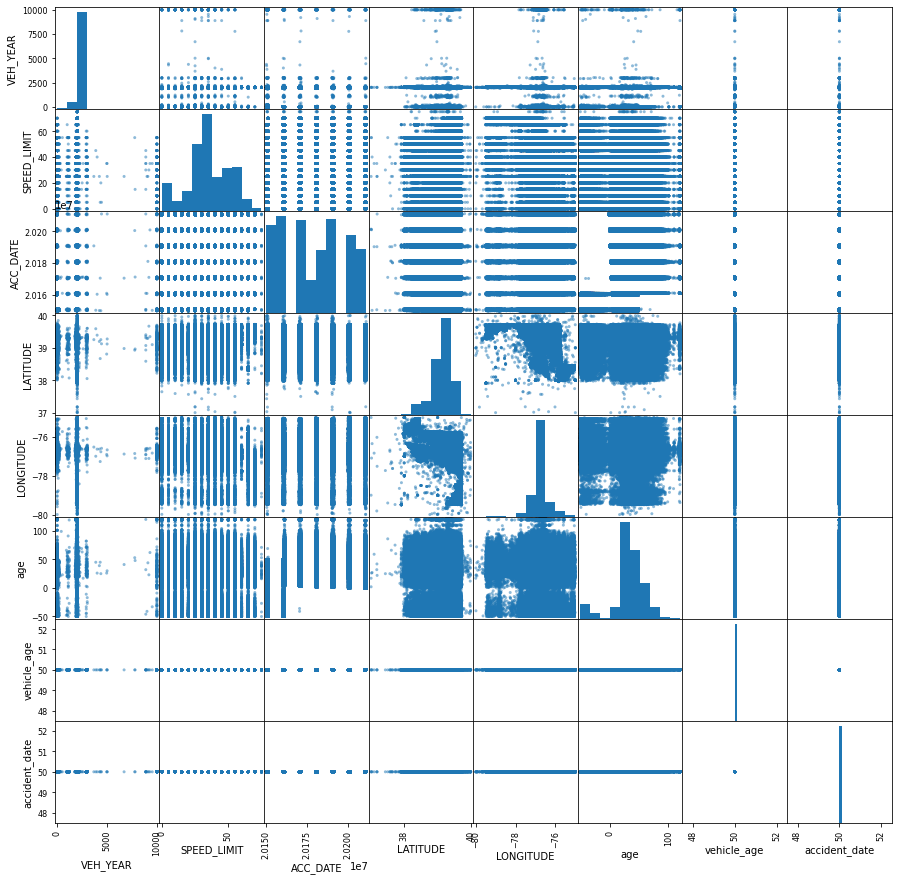

In [50]:
pd.plotting.scatter_matrix(merge_data,figsize=(15,15))
plt.show()

### Visulasing pairplot for merged dataset

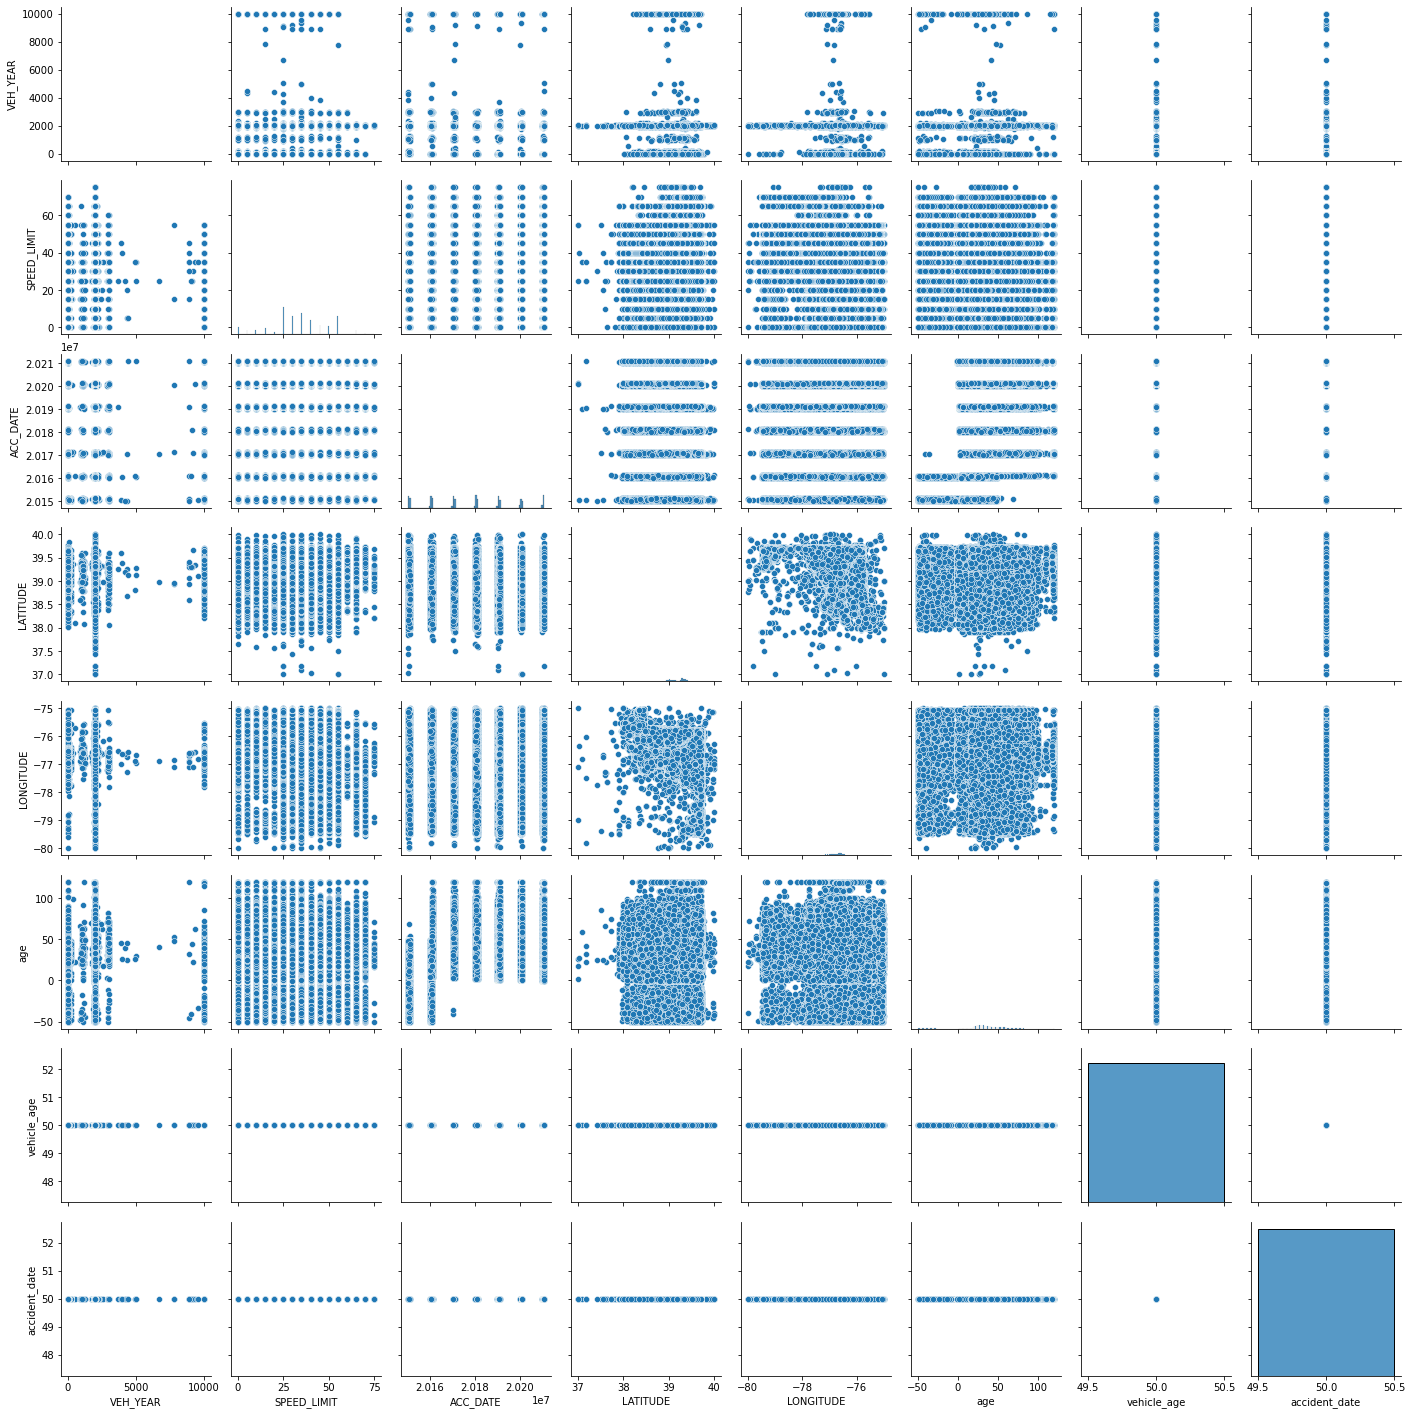

In [51]:
sns.pairplot(merge_data)                                              

## Question:1
### Number of accidents where the speed limit was above 51 miles per hour are 16052 

In [52]:
accidents=merge_data[merge_data['SPEED_LIMIT']>51].count()
accidents['SPEED_LIMIT']

120985

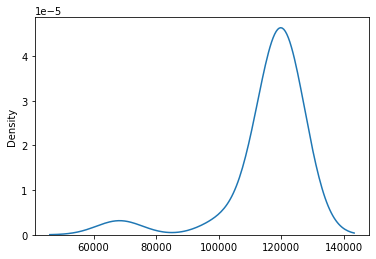

In [53]:
sns.kdeplot(accidents);

## Question:2
### Determine the number of accidents where the speed limit was below 41 miles per hour. 

In [54]:
accidents1=merge_data[merge_data['SPEED_LIMIT']<41].count()
accidents1['SPEED_LIMIT']

524293

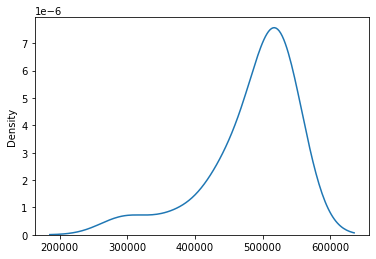

In [55]:
sns.kdeplot(accidents1);

### Storing accident date in correct format

In [56]:
merge_data['accident_date']=pd.to_datetime(merge_data['ACC_DATE'],format='%Y%m%d')

## Question: 3
### On which day of the week (Monday through Sunday) do the most of the crashes happen? 

In [57]:
days=merge_data['accident_date'].dt.day_name().value_counts()
days.sort_values(ascending=False)

Friday       117441
Thursday     108236
Tuesday      106085
Wednesday    105446
Saturday     103640
Monday       102638
Sunday        89334
Name: accident_date, dtype: int64

### Most of the crashes happened on friday


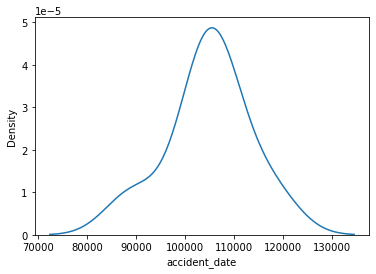

In [58]:
sns.kdeplot(days);